In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_customer = pd.read_csv('customer_dataset.csv')
df_transaction = pd.read_csv('synthetic_transactions.csv')

In [ ]:
df_customer.head()


,Customer ID,Name,Age,Location,Gender,Account Type,Device Count
0,10001,Nimal Fernando,61,Jaffna,Female,Savings,5
1,10002,Sunil Samarasinghe,60,Jaffna,Other,Current,3
2,10003,Ruwan Jayasinghe,67,Galle,Other,Savings,1
3,10004,Lakshan Perera,19,Anuradhapura,Female,Savings,5
4,10005,Ruwan Kumara,52,Ratnapura,Other,Current,4


In [ ]:
df_transaction.head()

,Transaction ID,Timestamp,Sender Account,Transaction Type,IN_OUT,Amount,Recipient Bank,Fraud
0,T00001,2024-04-05 17:23:48,10018,Transfer,Out,83532.64,B0008,1
1,T00002,2024-03-13 16:01:21,10050,Credit,Out,45076.82,B0006,0
2,T00003,2024-05-07 16:10:30,10039,Transfer,Out,74779.42,B0006,0
3,T00004,2024-06-30 07:46:14,10054,Transfer,Out,80604.48,B0002,0
4,T00005,2024-01-26 23:57:50,10043,Debit,In,25944.87,B0005,0


In [ ]:
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    int64 
 1   Name          100 non-null    object
 2   Age           100 non-null    int64 
 3   Location      100 non-null    object
 4   Gender        100 non-null    object
 5   Account Type  100 non-null    object
 6   Device Count  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction ID    100000 non-null  object 
 1   Timestamp         100000 non-null  object 
 2   Sender Account    100000 non-null  int64  
 3   Transaction Type  100000 non-null  object 
 4   IN_OUT            100000 non-null  object 
 5   Amount            100000 non-null  float64
 6   Recipient Bank    100000 non-null  object 
 7   Fraud             100000 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


Check for Null Values and Duplicate Records

In [ ]:
df_customer.isnull().sum()
df_transaction.isnull().sum()

,0
Transaction ID,0
Timestamp,0
Sender Account,0
Transaction Type,0
IN_OUT,0
Amount,0
Recipient Bank,0
Fraud,0


In [ ]:
df_transaction.duplicated().sum()

0

In [ ]:
df_transaction['Fraud'].value_counts()


,count
Fraud,
0,95393
1,4607


EDA

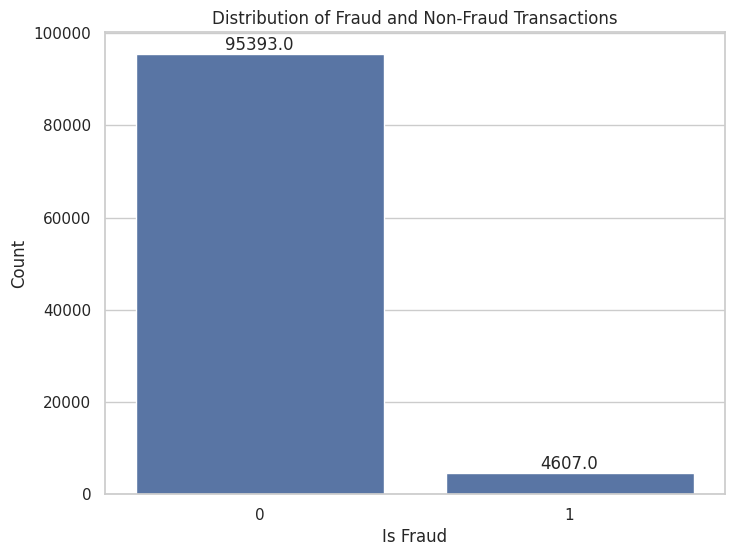

In [ ]:
#Analyze Fraud Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Fraud', data=df_transaction)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


In [ ]:
# Analyze transaction types
print(df_transaction['Transaction Type'].value_counts())

Transaction Type
Transfer    40159
Debit       29845
Payment     19929
Credit      10067
Name: count, dtype: int64


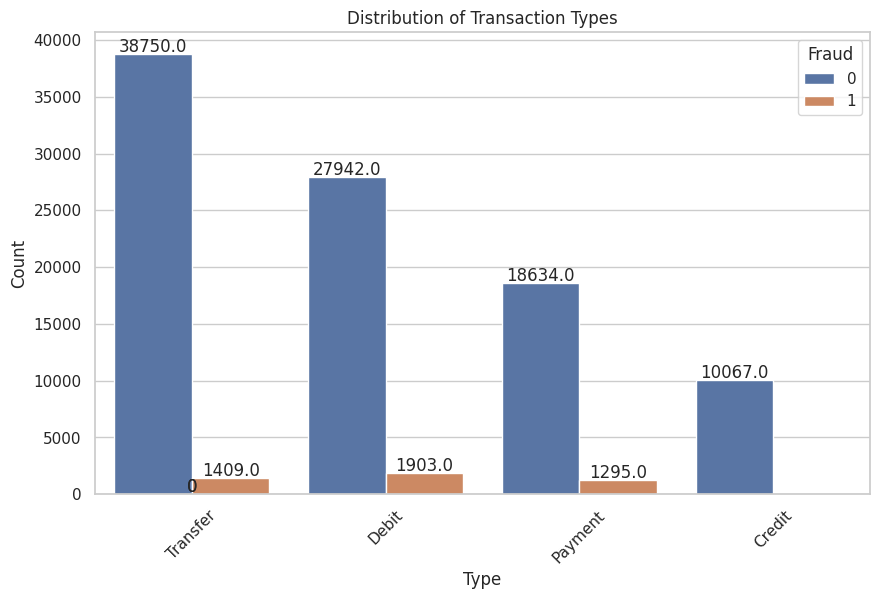

In [ ]:
#Visualize Transaction Types
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Transaction Type', data=df_transaction, order=df_transaction['Transaction Type'].value_counts().index,hue='Fraud')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_transaction['Timestamp'] = pd.to_datetime(df_transaction['Timestamp'])

#Date Range
date_range = df_transaction['Timestamp'].min(), df_transaction['Timestamp'].max()

print(f"Date Range: {date_range[0]} to {date_range[1]}")

Date Range: 2024-01-01 00:08:37 to 2024-10-05 23:34:42


Date/Time Based Analysis

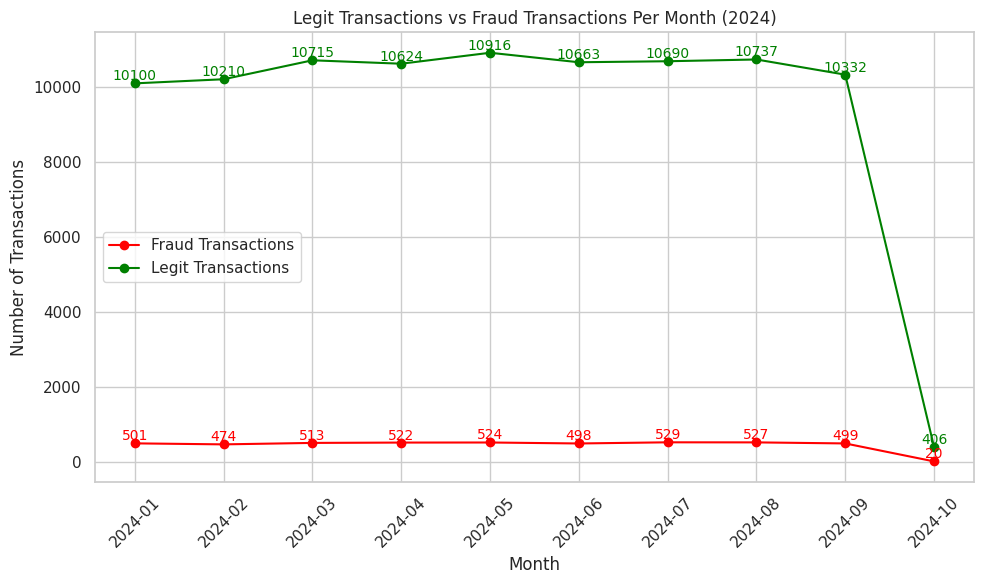

In [ ]:
# Extract the year and month from the 'Timestamp' column
df_transaction['YearMonth'] = df_transaction['Timestamp'].dt.to_period('M')

# Group by 'YearMonth'
fraud_transactions = df_transaction[df_transaction['Fraud'] == 1].groupby('YearMonth').size()
legit_transactions = df_transaction[df_transaction['Fraud'] == 0].groupby('YearMonth').size()


plt.figure(figsize=(10, 6))
plt.plot(fraud_transactions.index.astype(str), fraud_transactions, label='Fraud Transactions', marker='o', color='red')
plt.plot(legit_transactions.index.astype(str), legit_transactions, label='Legit Transactions', marker='o', color='green')


plt.title('Legit Transactions vs Fraud Transactions Per Month (2024)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Adding data labels
for i, count in enumerate(fraud_transactions):
    plt.text(fraud_transactions.index.astype(str)[i], count, str(count), ha='center', va='bottom', fontsize=10, color='red')

for i, count in enumerate(legit_transactions):
    plt.text(legit_transactions.index.astype(str)[i], count, str(count), ha='center', va='bottom', fontsize=10, color='green')


plt.tight_layout()
plt.show()

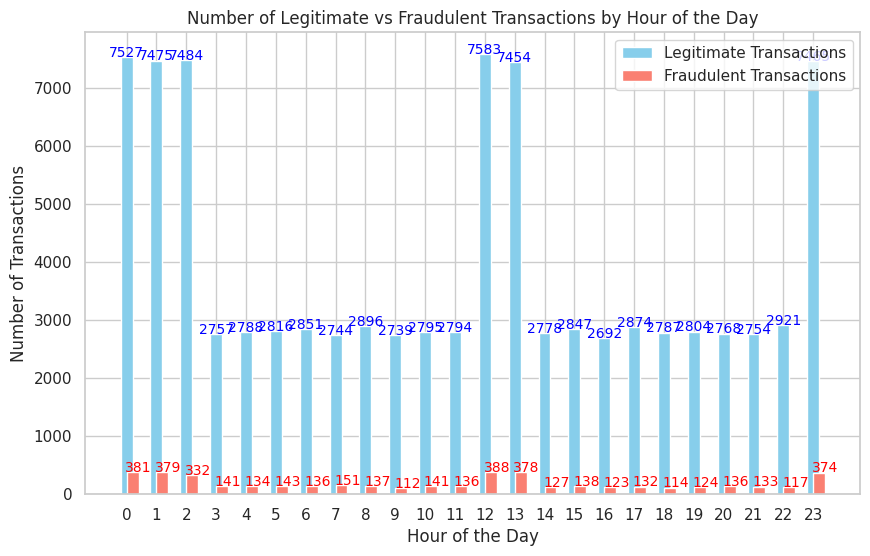

In [ ]:
# Extract the hour from the 'Timestamp' column
df_transaction['Hour'] = df_transaction['Timestamp'].dt.hour

# Group by hour and count the number of legitimate (Fraud == 0) and fraudulent (Fraud == 1) transactions
transactions_by_hour_fraud = df_transaction[df_transaction['Fraud'] == 1].groupby('Hour').size()
transactions_by_hour_legit = df_transaction[df_transaction['Fraud'] == 0].groupby('Hour').size()

# Ensure both Series have all hours (fill missing hours with 0)
hours_range = range(24)
transactions_by_hour_fraud = transactions_by_hour_fraud.reindex(hours_range, fill_value=0)
transactions_by_hour_legit = transactions_by_hour_legit.reindex(hours_range, fill_value=0)

# Plotting both fraud and legitimate transactions by hour
plt.figure(figsize=(10, 6))
width = 0.4
x_ticks = range(24)

# Plot legitimate transactions
plt.bar(transactions_by_hour_legit.index, transactions_by_hour_legit, width=width, label='Legitimate Transactions', color='skyblue', align='center')
# Plot fraudulent transactions
plt.bar(transactions_by_hour_fraud.index, transactions_by_hour_fraud, width=width, label='Fraudulent Transactions', color='salmon', align='edge')

# Adding counts on top of the bars
for i in x_ticks:
    plt.text(i, transactions_by_hour_legit[i] + 5, str(transactions_by_hour_legit[i]), ha='center', color='blue', fontsize=10)
    plt.text(i + width, transactions_by_hour_fraud[i] + 5, str(transactions_by_hour_fraud[i]), ha='center', color='red', fontsize=10)

# Labels, title, and grid
plt.title('Number of Legitimate vs Fraudulent Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(x_ticks)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


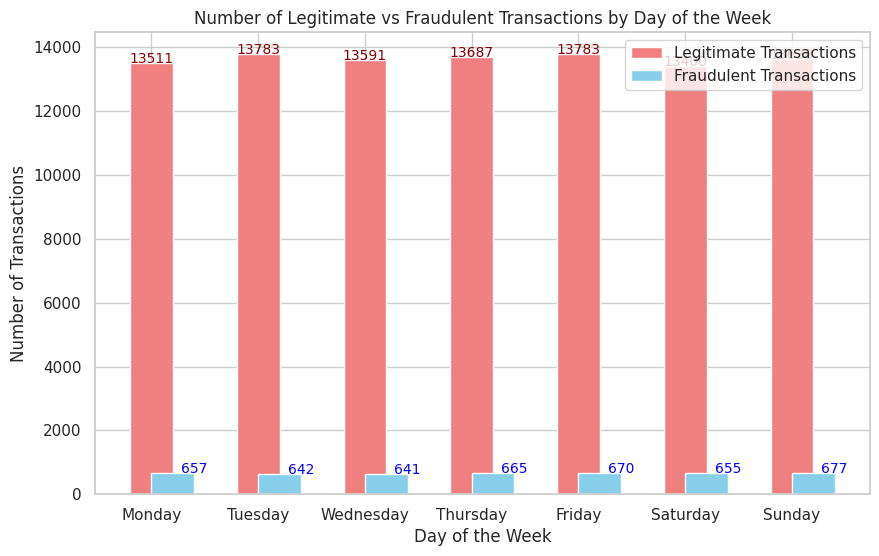

In [ ]:
# Extract the day of the week (0=Monday, 6=Sunday)
df_transaction['DayOfWeek'] = df_transaction['Timestamp'].dt.dayofweek

# Group by day of the week and count the number of legitimate (Fraud == 0) and fraudulent (Fraud == 1) transactions
transactions_by_day_fraud = df_transaction[df_transaction['Fraud'] == 1].groupby('DayOfWeek').size()
transactions_by_day_legit = df_transaction[df_transaction['Fraud'] == 0].groupby('DayOfWeek').size()

# Ensure both Series have all days of the week (0 to 6), fill missing days with 0
days_range = range(7)
transactions_by_day_fraud = transactions_by_day_fraud.reindex(days_range, fill_value=0)
transactions_by_day_legit = transactions_by_day_legit.reindex(days_range, fill_value=0)

# Plotting both fraud and legitimate transactions by day of the week
plt.figure(figsize=(10, 6))
width = 0.4
x_ticks = range(7)

# Plot legitimate transactions
plt.bar(transactions_by_day_legit.index, transactions_by_day_legit, width=width, label='Legitimate Transactions', color='lightcoral', align='center')
# Plot fraudulent transactions
plt.bar(transactions_by_day_fraud.index, transactions_by_day_fraud, width=width, label='Fraudulent Transactions', color='skyblue', align='edge')

# Adding counts on top of the bars
for i in x_ticks:
    plt.text(i, transactions_by_day_legit[i] + 5, str(transactions_by_day_legit[i]), ha='center', color='darkred', fontsize=10)
    plt.text(i + width, transactions_by_day_fraud[i] + 5, str(transactions_by_day_fraud[i]), ha='center', color='blue', fontsize=10)

# Labels, title, and grid
plt.title('Number of Legitimate vs Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(x_ticks, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Label days
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Recepient Bank Analysis

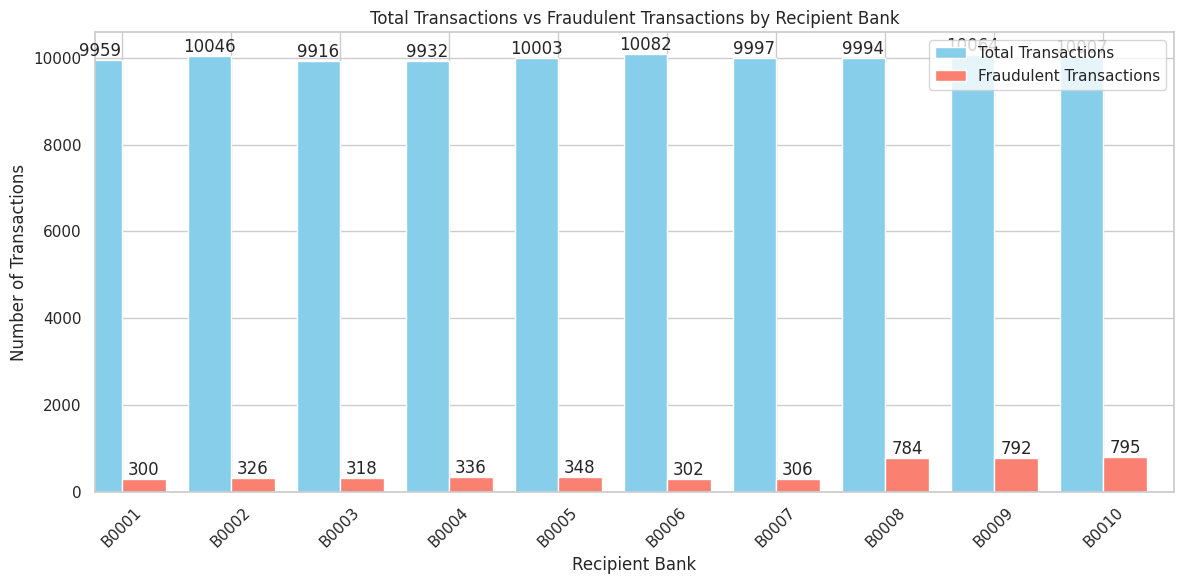

In [ ]:


total_transactions_by_bank = df_transaction.groupby('Recipient Bank').size()
fraud_transactions_by_bank = df_transaction[df_transaction['Fraud'] == 1].groupby('Recipient Bank').size()

# Merge the two series into a DataFrame for better visualization
transactions_summary_by_bank = pd.DataFrame({
    'Total Transactions': total_transactions_by_bank,
    'Fraudulent Transactions': fraud_transactions_by_bank
}).fillna(0)  # Fill missing fraudulent transaction counts with 0


transactions_summary_by_bank['Fraudulent Transactions'] = transactions_summary_by_bank['Fraudulent Transactions'].astype(int)

# Plotting the data
plt.figure(figsize=(12, 6))
ax = transactions_summary_by_bank['Total Transactions'].plot(kind='bar', color='skyblue', label='Total Transactions', width=0.4, position=1)
transactions_summary_by_bank['Fraudulent Transactions'].plot(kind='bar', color='salmon', label='Fraudulent Transactions', width=0.4, position=0)

plt.title('Total Transactions vs Fraudulent Transactions by Recipient Bank')
plt.xlabel('Recipient Bank')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.tight_layout()
plt.show()

Account-Based Analysis

In [ ]:

# Aggregations for account
df_account = df_transaction.groupby('Sender Account').agg(
    avg_amount_orig=('Amount', 'mean'),  # Average transaction amount for original accounts
    num_transactions_orig=('Amount', 'size'),
    num_fraud_transactions_orig=('Fraud', 'sum')
).reset_index()


print(df_account.head(10))


   Sender Account  avg_amount_orig  num_transactions_orig  \
0           10001     34299.858494                    976   
1           10002     36064.198763                    978   
2           10003     35369.115578                    977   
3           10004     35942.609074                   1047   
4           10005     34880.851196                   1020   
5           10006     34715.460732                    970   
6           10007     33414.258940                    981   
7           10008     34972.419277                    996   
8           10009     35752.296389                   1019   
9           10010     33570.226483                    998   

   num_fraud_transactions_orig  
0                            0  
1                            0  
2                          111  
3                          105  
4                            0  
5                            0  
6                            0  
7                            0  
8                            0 

In [ ]:
fraudulent_accounts = df_account[df_account['num_fraud_transactions_orig'] > 0]
fraudulent_count = fraudulent_accounts.shape[0]  # Count the number of rows
print(f"Count of fraudulent accounts: {fraudulent_count}")

Count of fraudulent accounts: 39


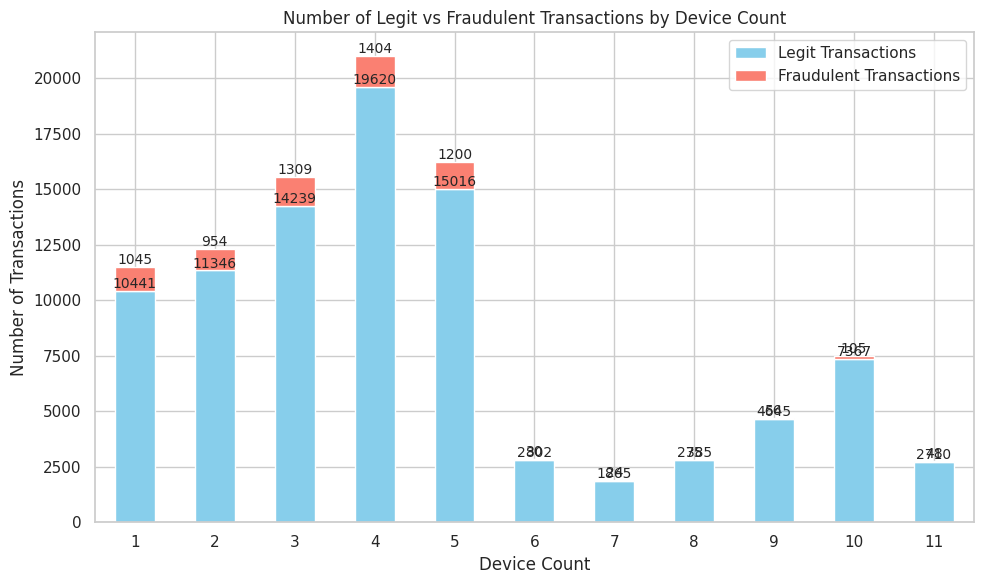

In [ ]:
merged_df = df_transaction.merge(df_customer[['Customer ID', 'Device Count']], left_on='Sender Account', right_on='Customer ID')

# Group by Device Count   and Fraud status
device_fraud_stats = merged_df.groupby(['Device Count', 'Fraud']).size().unstack(fill_value=0)

ax = device_fraud_stats.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Number of Legit vs Fraudulent Transactions by Device Count')
plt.xlabel('Device Count')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(['Legit Transactions', 'Fraudulent Transactions'])
plt.grid(True)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height() + p.get_y()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

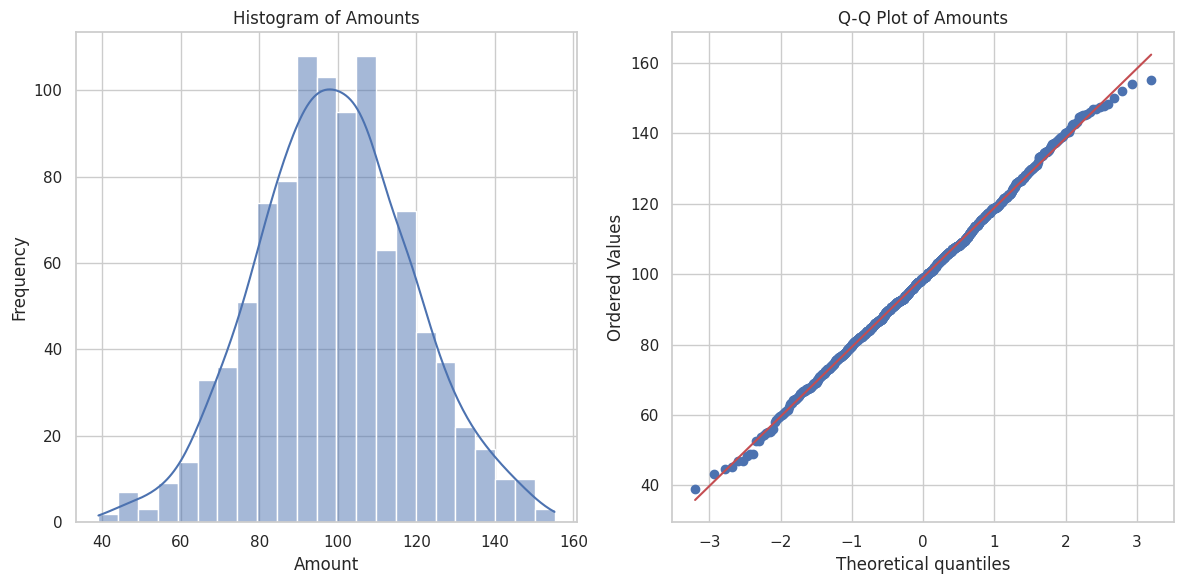

Shapiro-Wilk Test: Statistics=0.9985554728235057, p-value=0.5912267898687746
Kolmogorov-Smirnov Test: Statistics=0.01903411267034605, p-value=0.8547733408587939


In [ ]:
#Check Distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

amounts = df_transaction['Amount']  # Replace with your actual column name

# Example data for demonstration
np.random.seed(0)
amounts = np.random.normal(loc=100, scale=20, size=1000)  # Simulated normal data

# 1. Visual Inspection
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(amounts, kde=True)
plt.title('Histogram of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(amounts, dist="norm", plot=plt)
plt.title('Q-Q Plot of Amounts')

plt.tight_layout()
plt.show()

# 2. Statistical Tests
# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(amounts)
print(f"Shapiro-Wilk Test: Statistics={shapiro_stat}, p-value={shapiro_p}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = stats.kstest(amounts, 'norm', args=(np.mean(amounts), np.std(amounts)))
print(f"Kolmogorov-Smirnov Test: Statistics={ks_stat}, p-value={ks_p}")
